# 8. Activation Function을 수정해 보고 싶다. 
![Activation Function](https://gblobscdn.gitbook.com/assets%2F-LvBP1svpACTB1R1x_U4%2F-LvNWUoWieQqaGmU_gl9%2F-LvO3qs2RImYjpBE8vln%2Factivation-functions3.jpg)

## hyper parameter 설정

In [1]:
batch_size = 10
num_classes = 3
epochs = 200

## 라이브러리 및 함수 선언

In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
def hist_view(hist):
  print('## training loss and acc ##')
  fig, loss_ax = plt.subplots()
  acc_ax = loss_ax.twinx()

  loss_ax.plot(hist.history['loss'], 'y', label='train loss')
  loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

  loss_ax.set_xlabel('epoch')
  loss_ax.set_ylabel('loss')
  loss_ax.legend(loc='center')

  acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
  acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
  acc_ax.set_ylabel('accuracy')
  acc_ax.legend(loc='center right')

  plt.show()

## Date Load

In [3]:
# from sklearn import datasets
# iris = datasets.load_iris()
# x=iris.data
import pandas as pd
![ ! -f  iris0.csv ]&&wget http://j.finfra.com/_file/iris0.csv
iris=pd.read_csv("iris0.csv")



--2021-08-06 07:41:14--  http://j.finfra.com/_file/iris0.csv
Resolving j.finfra.com (j.finfra.com)... 211.252.85.187
Connecting to j.finfra.com (j.finfra.com)|211.252.85.187|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3730 (3.6K) [text/csv]
Saving to: ‘iris0.csv’

iris0.csv           100%[===================>]   3.64K  --.-KB/s    in 0s      

2021-08-06 07:41:14 (428 MB/s) - ‘iris0.csv’ saved [3730/3730]



## input data 와 target data 로 가공하기

In [4]:
x=iris.iloc[:,0:4].values
y_text=iris.iloc[:,4:5]

sets=y_text.drop_duplicates()["Species"].tolist()
encoder={k:v for v,k in enumerate(sets)}
y_num=[ encoder[i] for i in y_text["Species"].tolist() ]




## 훈련 데이터와 평가 데이터 나누기

In [5]:
# iris.target → y
y= keras.utils.to_categorical(y_num, num_classes)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((105, 4), (45, 4), (105, 3), (45, 3))

## 전체 activation function 확인해보기

In [6]:
dir(keras.activations)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

## Model 생성

### Activation function 설정

In [7]:
model = Sequential()
model.add(Dense(6, activation='tanh', input_shape=(4,)))

model.add(Dense(4, activation=keras.activations.tanh))
model.add(Dense(num_classes, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 30        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 15        
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


## 훈련시키기

In [9]:
# batch_size,epochs
hist=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(x_test, y_test))



## 평가 그래프

## training loss and acc ##


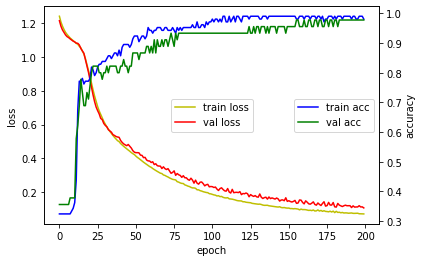

Test loss: 0.10594054311513901
Test accuracy: 0.9777777791023254


In [10]:
hist_view(hist)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


In [11]:
decoder = {k:v for k,v in enumerate( sets )}
decoder

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [12]:
r=np.argmax(model.predict(x_test[:10,:]), axis=-1)
[decoder[i] for i in r]

['virginica',
 'versicolor',
 'setosa',
 'virginica',
 'setosa',
 'virginica',
 'setosa',
 'versicolor',
 'versicolor',
 'versicolor']

# Lerning Rate(학습률)도 수정하고 싶다.

---

